In [1]:
import pandas as pd
import numpy as np
from numpy import absolute
import matplotlib.pyplot as plt
import ta
import sklearn
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [2]:
Cardano = pd.read_csv("/Users/nicolaspaganel/Desktop/Zürich/Cours/ML/project/Crypto df/coin_Cardano.csv")

In [3]:
Cardano.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
1,2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2,3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
3,4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
4,5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


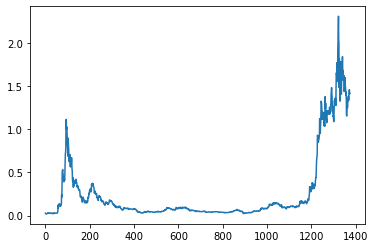

In [4]:
plt.plot( Cardano["Close"])

In [5]:
# Clean nan values
Cardano = ta.utils.dropna(Cardano)

print(Cardano.columns)

# Add all ta features filling nans values
Cardano = ta.add_all_ta_features(
    Cardano, "Open", "High", "Low", "Close", "Volume", fillna=True
)

print(Cardano.columns)
print(len(Cardano.columns))

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')
Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap', 'volume_adi', 'volume_obv', 'volume_cmf',
       'volume_fi', 'volume_mfi', 'volume_em', 'volume_sma_em', 'volume_vpt',
       'volume_nvi', 'volume_vwap', 'volatility_atr', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
       'volatility_ui', 'trend_macd', 'trend_macd_signal', 'trend_macd_diff',
       'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_

/opt/anaconda3/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/anaconda3/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [6]:
# List of our indicators 

indicators = ['volume_adi', 'volume_obv', 'volume_cmf',
       'volume_fi', 'volume_mfi', 'volume_em', 'volume_sma_em', 'volume_vpt',
       'volume_nvi', 'volume_vwap', 'volatility_atr', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
       'volatility_ui', 'trend_macd', 'trend_macd_signal', 'trend_macd_diff',
       'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'trend_ichimoku_base', 'trend_ichimoku_a', 'trend_ichimoku_b',
       'trend_visual_ichimoku_a', 'trend_visual_ichimoku_b', 'trend_aroon_up',
       'trend_aroon_down', 'trend_aroon_ind', 'trend_psar_up',
       'trend_psar_down', 'trend_psar_up_indicator',
       'trend_psar_down_indicator', 'trend_stc', 'momentum_rsi',
       'momentum_stoch_rsi', 'momentum_stoch_rsi_k', 'momentum_stoch_rsi_d',
       'momentum_tsi', 'momentum_uo', 'momentum_stoch',
       'momentum_stoch_signal', 'momentum_wr', 'momentum_ao', 'momentum_kama',
       'momentum_roc', 'momentum_ppo', 'momentum_ppo_signal',
       'momentum_ppo_hist', 'others_dr', 'others_dlr', 'others_cr']

In [61]:
""""
X, y = Cardano[indicators], Cardano["Close"]
# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
"""""

'"\nX, y = Cardano[indicators], Cardano["Close"]\n# define model\nmodel = Lasso(alpha=1.0)\n# define model evaluation method\ncv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)\n# evaluate model\nscores = cross_val_score(model, X, y, scoring=\'neg_mean_absolute_error\', cv=cv, n_jobs=-1)\n# force scores to be positive\nscores = absolute(scores)\nprint(\'Mean MAE: %.3f (%.3f)\' % (np.mean(scores), np.std(scores)))\n'

In [10]:
returns = Cardano["Close"].pct_change()
Cardano["Returns"] = returns

In [14]:
Cardano = Cardano[indicators].join(Cardano["Returns"]).drop(0)

In [15]:
Cardano

,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,...,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,Returns
1,-6.070702e+06,4.064350e+07,-0.081334,-8.696073e+04,0.000000,-0.000038,-0.000038,-5.516302e+07,802.713311,0.024794,...,0.000000,0.023924,0.000000,-5.934792,-1.186958,-4.747833,-19.728669,-21.975765,-19.728669,-0.197287
2,-5.178208e+06,4.964355e+07,-0.061911,-7.310329e+04,0.000000,-0.000048,-0.000043,-2.871049e+06,845.737644,0.024479,...,0.000000,0.023097,0.000000,-12.455387,-3.440644,-9.014743,5.359863,5.221157,-15.426236,0.053599
3,-5.330769e+06,4.408104e+07,-0.059761,-6.301183e+04,0.000000,-0.000008,-0.000031,3.700827e+05,828.662115,0.024293,...,0.000000,0.022416,0.000000,-18.898524,-6.532220,-12.366304,-2.019010,-2.039671,-17.133788,-0.020190
4,-1.223418e+07,3.630033e+07,-0.126149,-5.728871e+04,0.000000,-0.000064,-0.000039,-1.180310e+06,828.662115,0.023907,...,0.000000,0.020876,0.000000,-24.170970,-10.059970,-14.111000,-13.726280,-14.764516,-28.508237,-0.137263
5,-5.295668e+06,4.371157e+07,-0.050728,-4.656170e+04,14.641568,-0.000028,-0.000037,-1.078525e+05,936.017905,0.023620,...,-0.000615,0.020903,0.000000,-28.900125,-13.828001,-15.072124,12.955315,12.182211,-19.246254,0.129553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,1.489636e+11,1.606680e+11,0.079485,7.715935e+06,40.803677,-0.000017,-0.000039,2.578090e+07,1.340988,1.287375,...,-0.130026,1.413802,-2.434291,-14.631161,-12.570468,-2.060693,4.401398,4.307288,5277.170314,0.044014
1370,1.492675e+11,1.626961e+11,0.048280,1.021755e+07,45.608411,0.000243,-0.000017,1.131361e+08,1.352951,1.287734,...,-0.111837,1.413342,19.478555,-15.794977,-13.215370,-2.579607,0.892062,0.888106,5325.137984,0.008921
1371,1.499232e+11,1.645025e+11,0.034713,2.200846e+07,50.762187,0.000230,0.000013,8.402275e+07,1.402332,1.288290,...,-0.092363,1.415273,26.440825,-17.309043,-14.034104,-3.274938,3.649927,3.584895,5523.151544,0.036499
1372,1.492638e+11,1.627430e+11,-0.003602,5.470805e+06,53.162599,-0.000082,0.000046,1.635093e+06,1.351087,1.296258,...,-0.068013,1.414355,12.132075,-18.599922,-14.947268,-3.652654,-3.654291,-3.722733,5317.665228,-0.036543


In [62]:
# split into train and test sets
from sklearn.model_selection import train_test_split
Cardano_train, Cardano_test = train_test_split(Cardano,train_size = 0.67,random_state=None)

In [63]:
?train_test_split

In [84]:
#centrer et réduire les données d'apprentissage
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
Z_Cardano_train = sc.fit_transform(Cardano_train)

In [125]:
print(np.mean(Z_Cardano_train,axis=0))
print(np.var(Z_Cardano_train,axis=0))

[ 0.00000000e+00  0.00000000e+00  3.09267785e-17  2.51280075e-17
 -1.62365587e-16  3.86584731e-18  2.89938548e-18  9.66461828e-18
  2.31950839e-17  3.47926258e-17 -3.09267785e-17  4.63901677e-17
  3.86584731e-18  2.70609312e-17 -6.18535570e-17 -4.83230914e-17
 -4.63901677e-17 -2.89938548e-18  5.02560150e-17 -4.63901677e-17
  0.00000000e+00 -5.74078326e-16  5.60547860e-17  1.32405270e-16
  5.41218624e-17 -1.12109572e-16  5.79877097e-17  6.57194043e-17
  1.04377877e-16 -1.08243725e-16 -1.25640038e-16 -1.15975419e-17
 -3.47926258e-17  9.66461828e-18 -1.93292366e-17  1.15975419e-16
 -4.25243204e-17 -2.70609312e-17  1.73963129e-16 -4.63901677e-17
  1.00512030e-16  1.73963129e-16  3.67255495e-16 -3.86584731e-18
  7.73169462e-18  9.72260599e-16 -1.93292366e-17  7.73169462e-18
 -7.73169462e-18  3.86584731e-18  3.86584731e-18 -1.00512030e-16
  0.00000000e+00 -5.79877097e-17 -1.54633892e-17 -6.18535570e-17
  1.19841267e-16 -3.86584731e-18 -3.86584731e-17 -3.86584731e-18
  5.02560150e-17  3.86584

In [111]:
#régression Lasso, paramètres par défaut (alpha = 1.0)
from sklearn.linear_model import Lasso
regLasso1 = Lasso(fit_intercept=False,normalize=False, max_iter=2000)
print(regLasso1)

Lasso(fit_intercept=False, max_iter=2000)


In [112]:
?Lasso

In [126]:
#apprentissage
regLasso1.fit(Z_Cardano_train[:,:-1],Z_Cardano_train[:,-1:])
#les coefficients
print(regLasso1.coef_)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000

In [127]:
#lasso path (10 valeurs de alpha à tester)
my_alphas = np.array([0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0])

In [132]:
?lasso_path

In [138]:
Z_Cardano_train[:,-1:].shape

(919, 1)

In [139]:
#obtention des valeurs des coefs. corresp.
from sklearn.linear_model import lasso_path
alpha_for_path, coefs_lasso, _ = lasso_path(Z_Cardano_train[:,:-1],Z_Cardano_train[:,-1:],alphas=my_alphas)


In [148]:
coefs_lasso[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [142]:
 #dim. matrice des coefficients

print(coefs_lasso.shape)

(1, 83, 10)


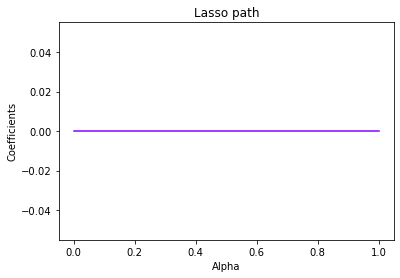

In [149]:
#jeu de couleurs pour faire joli
import matplotlib.cm as cm
couleurs = cm.rainbow(np.linspace(0,1,83))
#graphique lasso path (une courbe par variable)
for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_for_path,coefs_lasso[0][i,:],c=couleurs[i])
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.show()

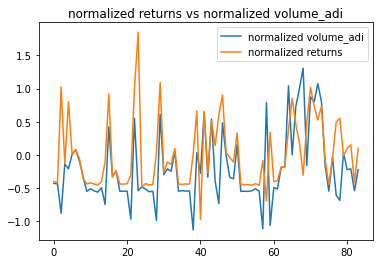

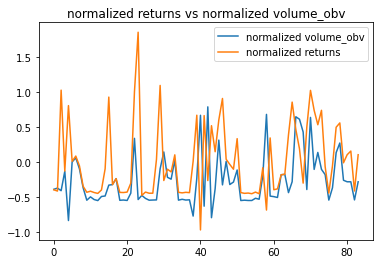

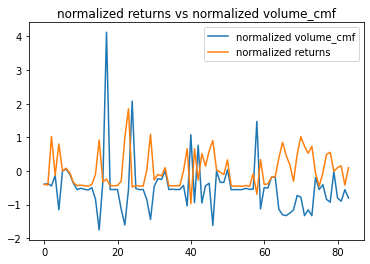

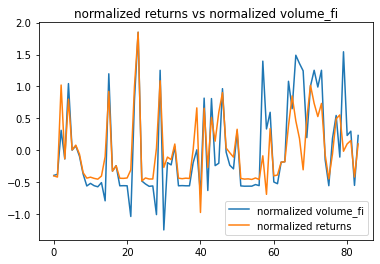

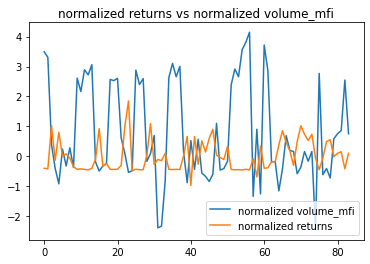

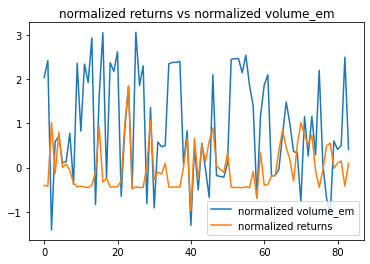

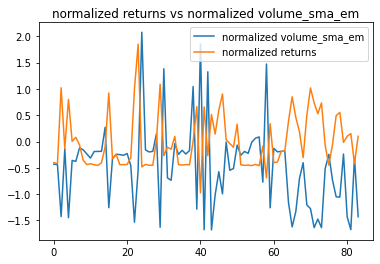

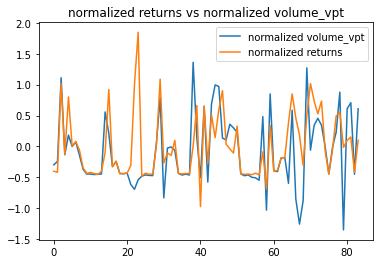

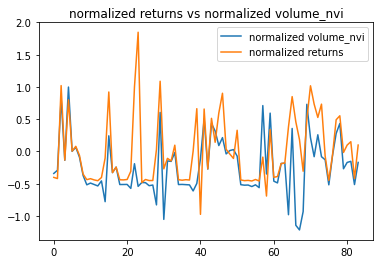

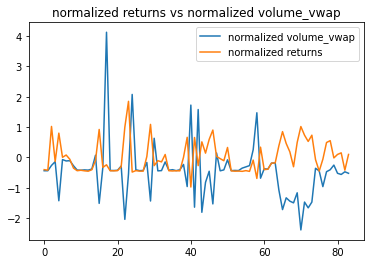

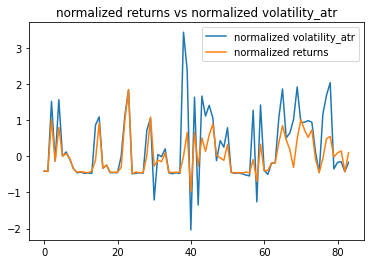

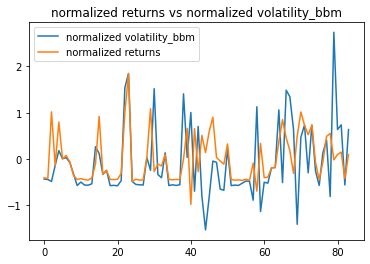

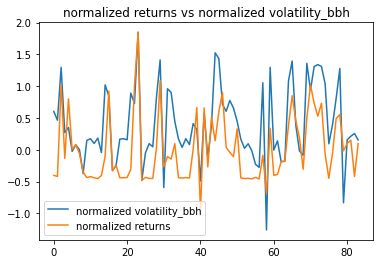

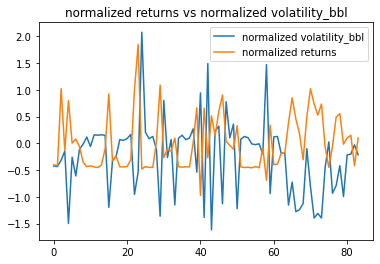

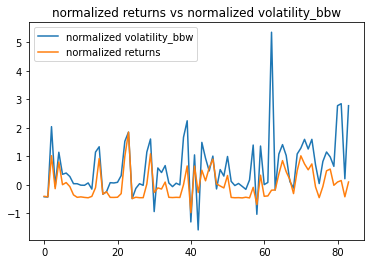

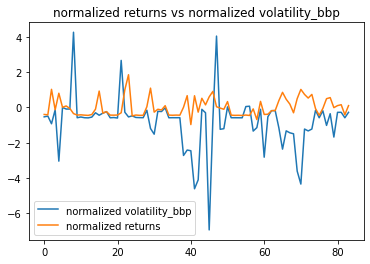

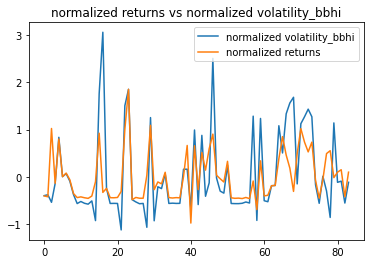

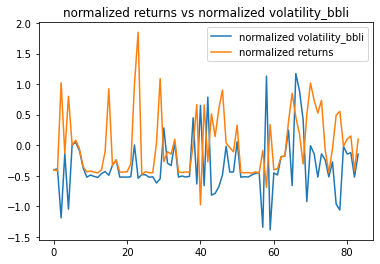

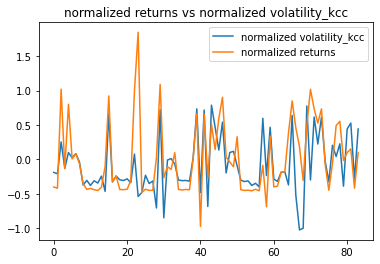

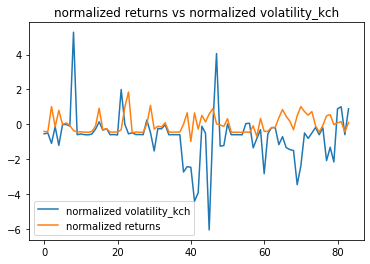

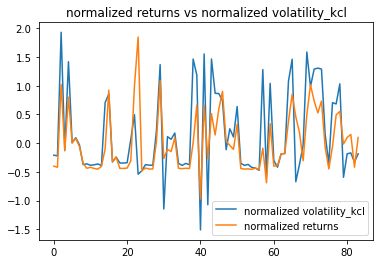

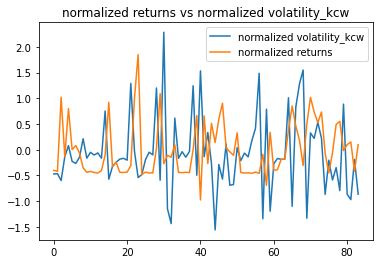

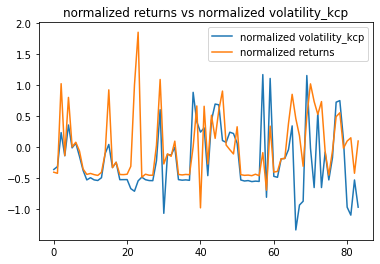

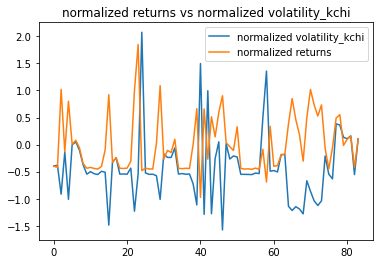

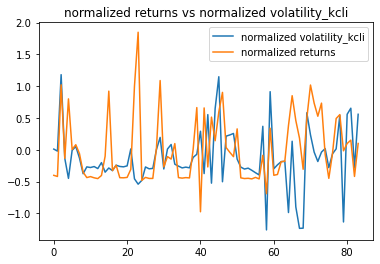

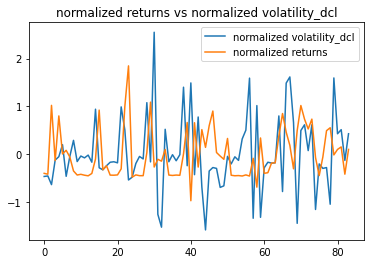

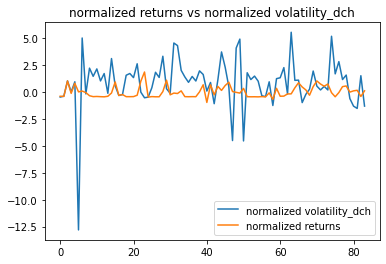

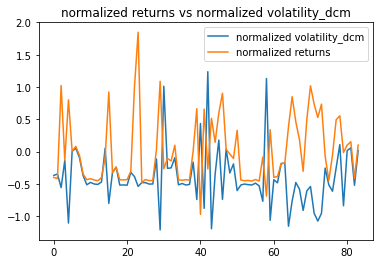

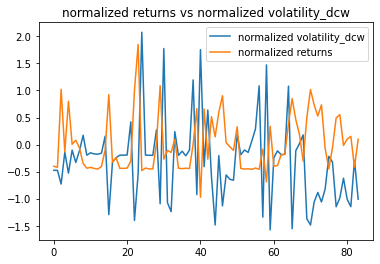

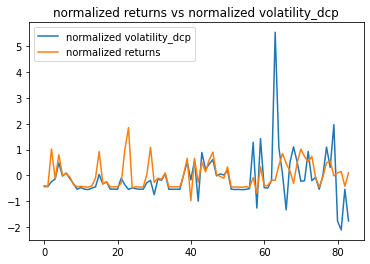

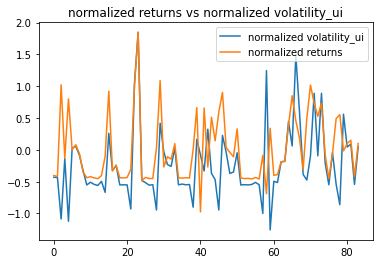

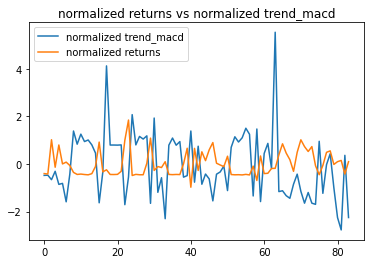

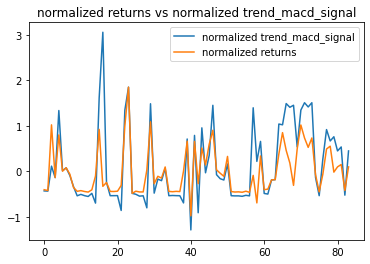

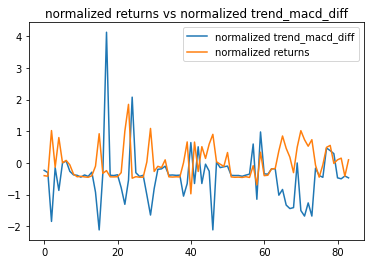

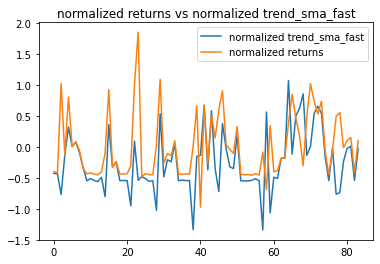

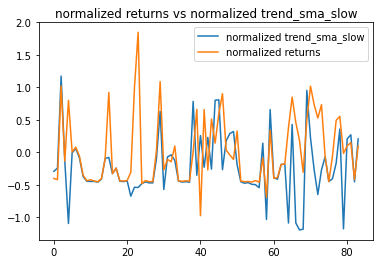

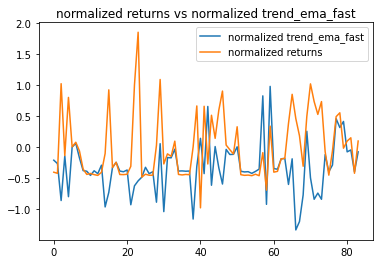

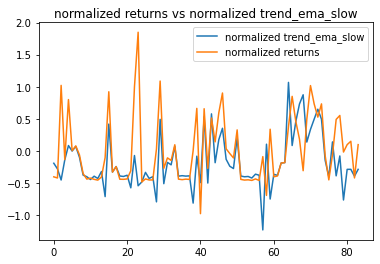

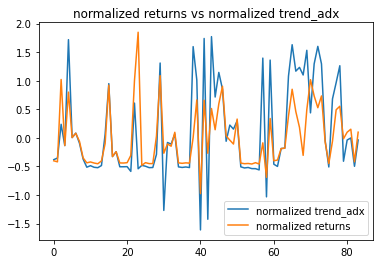

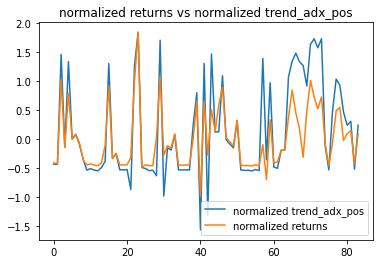

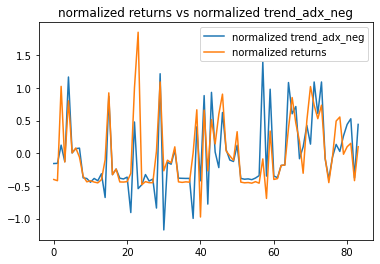

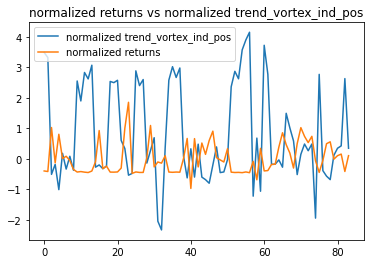

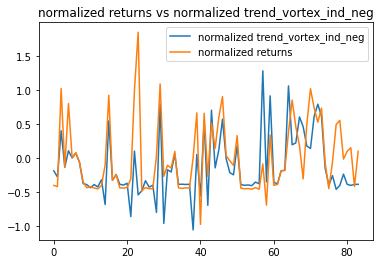

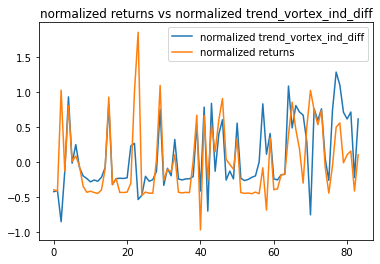

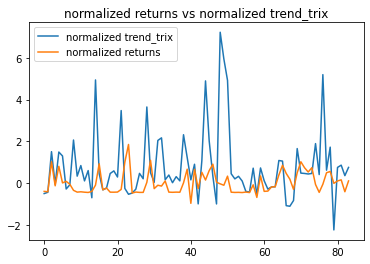

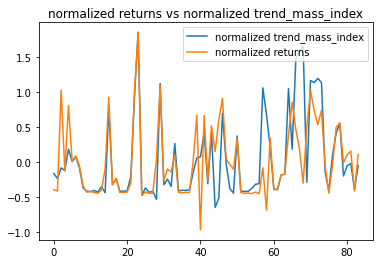

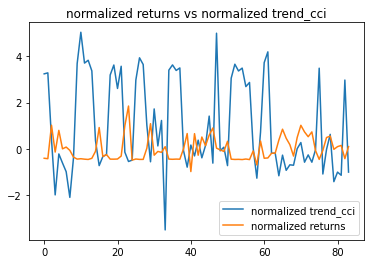

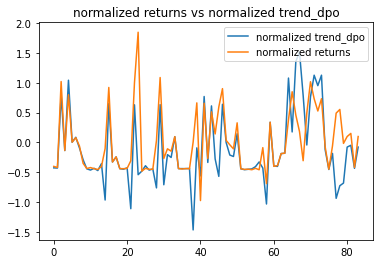

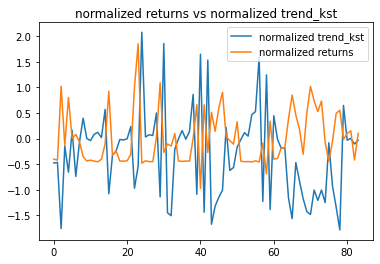

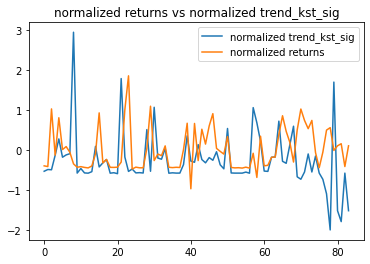

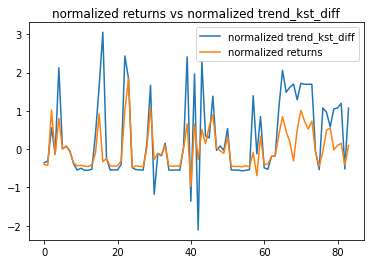

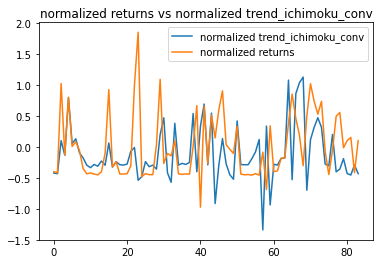

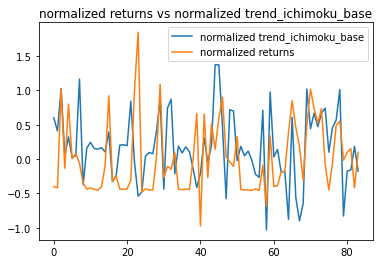

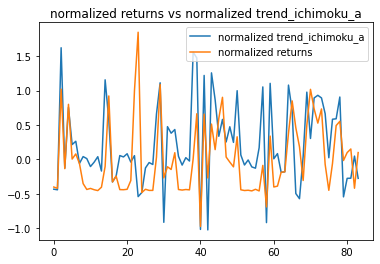

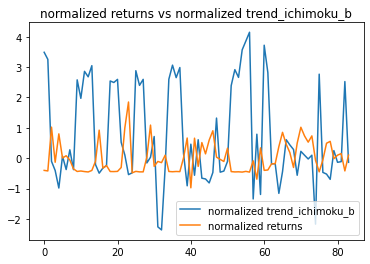

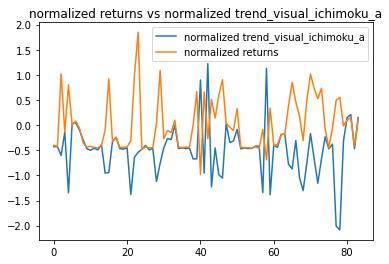

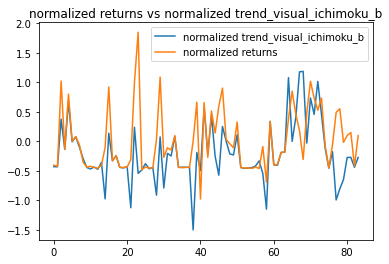

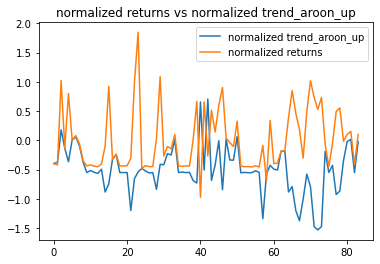

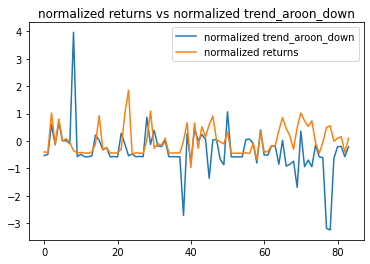

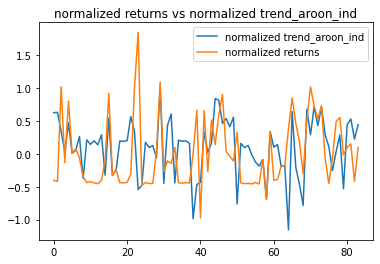

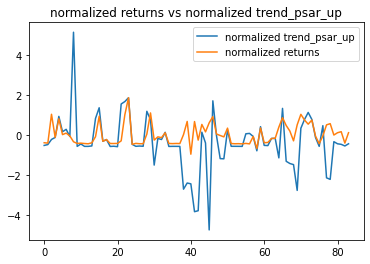

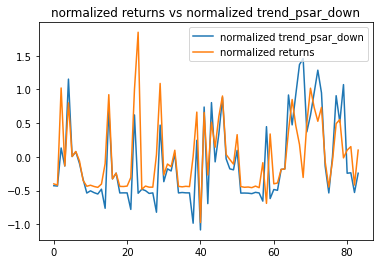

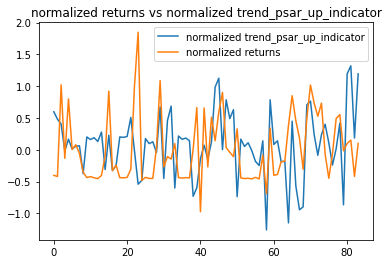

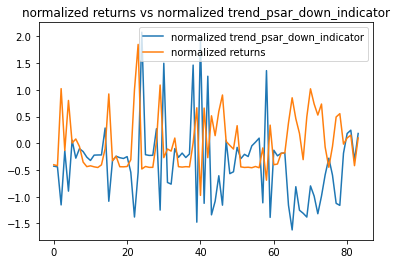

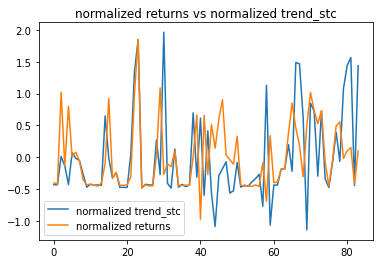

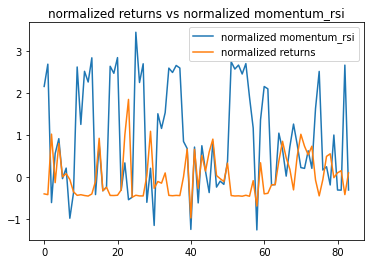

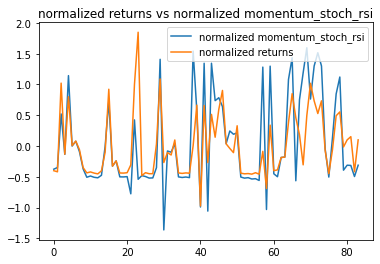

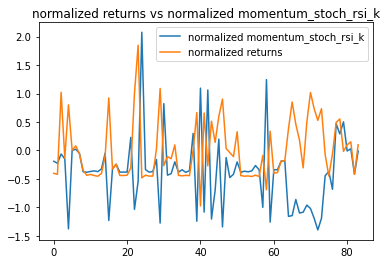

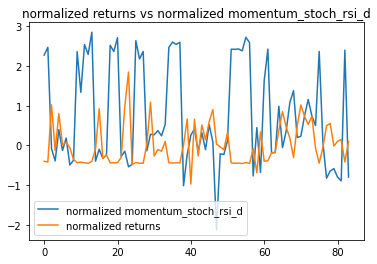

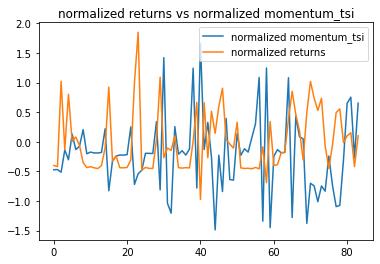

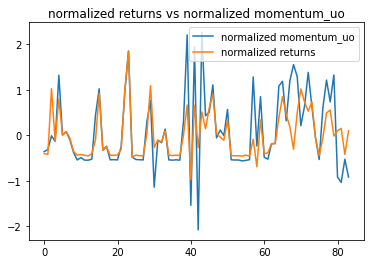

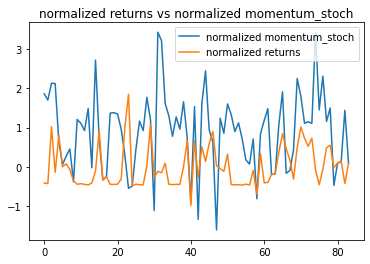

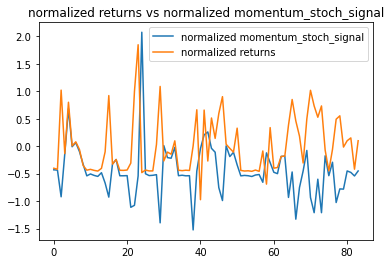

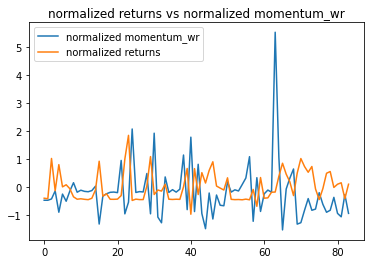

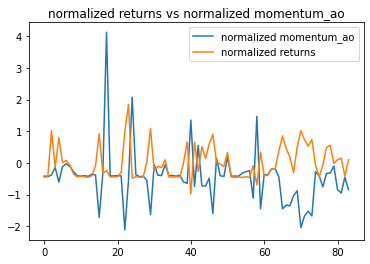

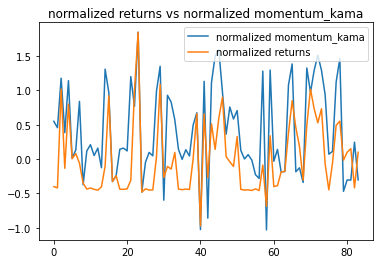

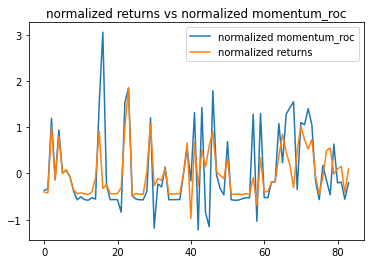

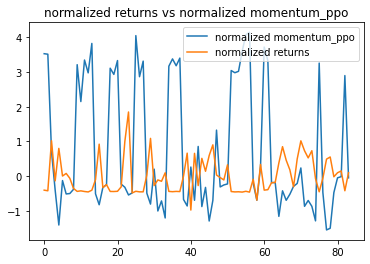

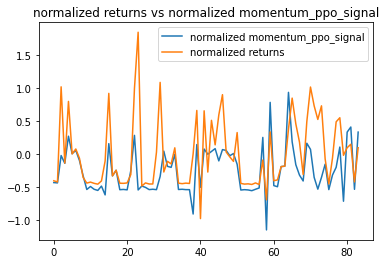

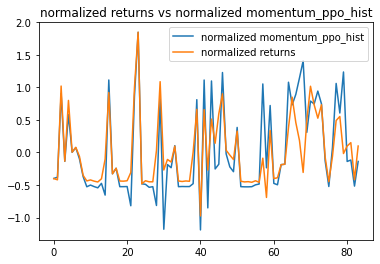

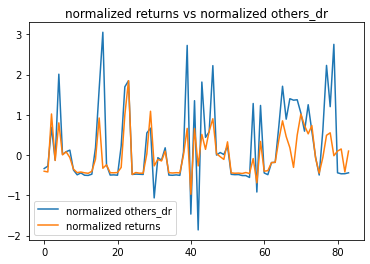

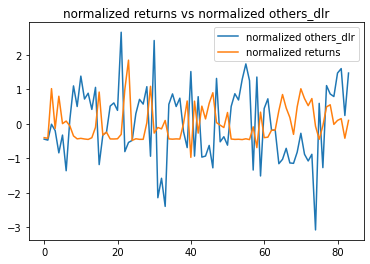

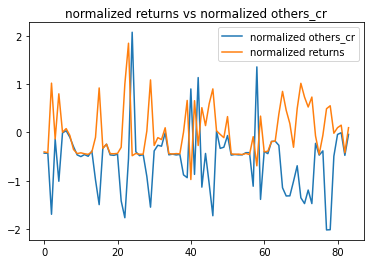

In [105]:
for i in range(len(indicators)):
    plt.plot(Z_Cardano_train[i],label = "normalized "+ indicators[i])
    plt.plot(Z_Cardano_train[-1], label = "normalized returns " )
    plt.title("normalized returns vs normalized " + indicators[i])
    plt.legend()
    plt.show()